# Prototyp: Handgeschriebene Zahlen erkennen

## Python-Erweiterungen laden

In [20]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

## Daten laden

In unserem Beispiel werden die Daten von der sklern Erweiterung zur Verfügung gestellt. Hier könnte man aber auch einen lokalen Datensatz einlesen.

In [21]:
# get
digits = datasets.load_digits()

## Daten visualisieren

Wir wollen wissen, wie die Daten aussehen.

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into 

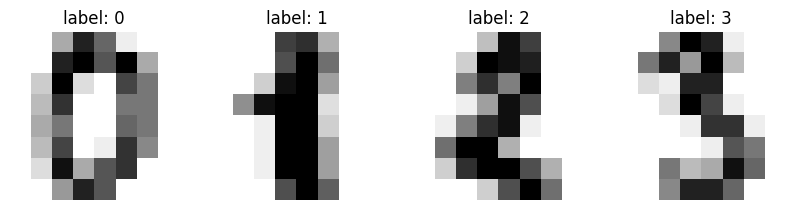

In [22]:
# explore
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("label: %i" % label)

print(dir(digits))
print(digits.DESCR)
print(digits.feature_names)

## Daten transformieren

Gerade bei eigenen Datensätzen stimmt die Formatierung des Datensatzes nicht, um ihn direkt für das Trainiren des Modells zu verwenden. 

In [23]:
# prepare
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
prepared_dataset = pd.DataFrame(data=np.c_[data, digits.target], columns=digits.feature_names + ['target'])

## Datensatz in Trainings- und Testdaten aufteilen

Damit wir wissen, wie gut ein Modell ist, brauchen wir immer einen Trainigs- und einen Testdatensatz. Diese dürfen sich nicht überlagern, sollten aber aus derselben Grundgesamtheit stammen. In unserem Fall heisst das, dass wir den Datensatz nicht so aufteilen sollen, dass alle Ziffern in den Trainingsdaten von Person A geschrieben wurden und jene in den Testdaten von Person B. Mit 'shuffle' definieren wir, ob die Daten zufällig aus der Grundgesamtheit gezogen werden oder der Datensatz einfach in erste und zweite Hälfte aufgeteilt wird im Fall von `test_size=0.5`.

In [24]:
# split
train_dataset, test_dataset = train_test_split(prepared_dataset, test_size=0.5, shuffle=False)

## Modell trainieren

Unsere Problemstellung ist ein Klassifizierungsproblem. Wir wollen die Bilder einer Ziffer von Null bis Neun zuordnen können. Deshalb wählen wir eine Support Vector Machine (svm) für Classification (SVC).

Mehr Informationen zum den verschiedenen Modellen gibt es hier: https://scikit-learn.org/stable/modules/svm.html#classification

Mehr Information zum svm.SVC und dessen Parametern kann hier gefunden werden: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [25]:
# train
X_train = train_dataset.drop('target', axis=1).values
y_train = train_dataset.loc[:, 'target'].values

model = svm.SVC(kernel="linear", C=0.025)
model.fit(X_train, y_train)

SVC(C=0.025, kernel='linear')

## Modell testen

Beim Testen verwenden wir das trainierte Modell am Testdatensatz und schauen, wie gut es mit diesen Daten zurecht kommt. Die Confusion-Matrix stellt der ware Ziffernwert auf dem Bild dem vorhergesagten gegenüber.

f1 score: 0.9447774845903595


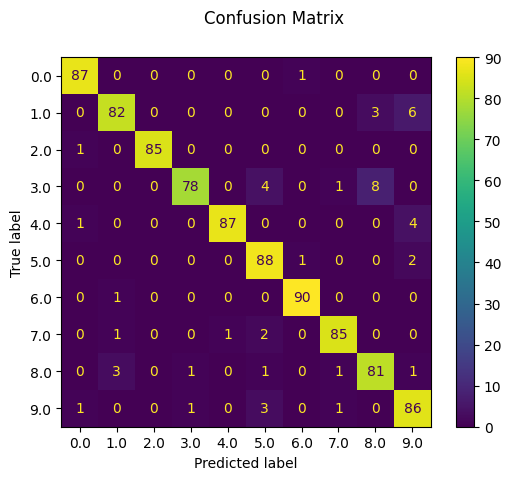

In [26]:
# evaluate
X_test = test_dataset.drop('target', axis=1).values
y_test = test_dataset.loc[:, 'target'].values

predicted = model.predict(X_test)

f1 = metrics.f1_score(y_test, predicted, average="macro")
print(f"f1 score: {f1}")

cm_plot = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
cm_plot.figure_.suptitle("Confusion Matrix")
plt.show()